## #Title of the project

> Section: .......... 

> Team members: .......

## Executive summary

Provide a summary of the data analysis done in this project.  

## Importing libraries

*To begin, you will need to import the necessary libraries*

In [862]:
import pandas as pd # used for reading data and loading it
import matplotlib.pyplot as plt # used for visualization
import seaborn as sns # used for visualization




## Explore your data

*Explore the data: Before diving into analysis, it's important to get a general idea of the data. Use the necessary functions to explore the data and get a sense of its structure and contents.*

In [863]:
data = pd.read_csv('supermarket_sales.csv') # dataset loaded
print(data.columns) # checking dataset and its details

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')


In [864]:
print(data.head) # quick preview of the first few rows

<bound method NDFrame.head of        Invoice ID Branch       City Customer type  Gender  \
0     750-67-8428      A     Yangon        Member  Female   
1     226-31-3081      C  Naypyitaw        Normal  Female   
2     631-41-3108      A     Yangon        Normal    Male   
3     123-19-1176      A     Yangon        Member    Male   
4     373-73-7910      A     Yangon        Normal    Male   
...           ...    ...        ...           ...     ...   
1000  233-67-5758      C  Naypyitaw        Normal    Male   
1001  303-96-2227      B   Mandalay        Normal  Female   
1002  727-02-1313      A     Yangon        Member    Male   
1003  347-56-2442      A     Yangon        Normal    Male   
1004  849-09-3807      A     Yangon        Member  Female   

                Product line  Unit price  Quantity   Tax 5%      Total  \
0          Health and beauty       74.69         7  26.1415   548.9715   
1     Electronic accessories       15.28         5   3.8200    80.2200   
2         Home 

In [865]:
# as seen, the dataset contains details about purchases, such as product line,
# gender of customer, unit price, quantity, tax (more can be seen after printing
# the head of the dataset using data.head() method)

In [866]:
print(data.shape) 
# after printing, we can see that tha dataset contains
# 1005 rows (number of purchases) and 17 columns (details about each purchase)

(1005, 17)


In [867]:
print(data.dtypes)
# checking of what type is each column so we can work with them properly
# example: quantity is of type int

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object


In [868]:
print(data.describe())
# using .describe() method can show us how the values are "spread" in the dataset
# for example, UNIT PRICE, TOTAL AMOUNT OF INVOICE, COST OF GOODS SOLD, and QUANTITY
# seem to have a pretty high variability suggested by the difference of the STANDARD
# DEVIATION and their MEAN VALUE - we should look into that
# also, GROSS MARGIN looks suspicious :)

# when looking into other details, they seem to have a decent spread
# also check for quartiles (example quantity : Q1 = 3, Q2 = 5, Q3 = 8) so it
# means they are well distributed


        Unit price     Quantity       Tax 5%        Total         cogs  \
count  1003.000000  1005.000000  1005.000000  1004.000000  1005.000000   
mean     55.752871     5.518408    15.394277   322.784715   307.885542   
std      26.515607     2.925181    11.734763   246.052238   234.695263   
min      10.080000     1.000000     0.508500    10.678500    10.170000   
25%      33.050000     3.000000     5.977000   125.401500   119.540000   
50%      55.390000     5.000000    12.080000   253.596000   241.600000   
75%      78.010000     8.000000    22.430000   470.998500   448.600000   
max      99.960000    10.000000    49.650000  1042.650000   993.000000   

       gross margin percentage  gross income       Rating  
count             1.005000e+03   1005.000000  1005.000000  
mean              4.761905e+00     15.394277     6.975522  
std               8.886206e-16     11.734763     1.718118  
min               4.761905e+00      0.508500     4.000000  
25%               4.761905e+00   

In [869]:
# checking all unique values in Product Line
unique_product_line = data['Product line'].unique()
print(unique_product_line)

['Health and beauty' 'Electronic accessories' 'Home and lifestyle'
 'Sports and travel' 'Food and beverages' 'Fashion accessories']


In [870]:
print(data.nunique())
# it could be useful to check the number of unique values for each column
# for example, there are only 3 cities where the purchases are made

Invoice ID                 1000
Branch                        3
City                          3
Customer type                 2
Gender                        2
Product line                  6
Unit price                  941
Quantity                     10
Tax 5%                      990
Total                       989
Date                         89
Time                        506
Payment                       3
cogs                        990
gross margin percentage       1
gross income                990
Rating                       61
dtype: int64


## Clean data

*Clean the data: Data can contain errors, null values, outliers, etc. It's important to clean the data before any analysis. Use Pandas functions  to clean the data.*

In [871]:
print(data.isnull().sum())
# checking for null values
# we can see that there are not a lot of null values, so we don't have to remove any column

Invoice ID                 0
Branch                     4
City                       0
Customer type              2
Gender                     2
Product line               0
Unit price                 2
Quantity                   0
Tax 5%                     0
Total                      1
Date                       2
Time                       0
Payment                    4
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64


In [872]:
most_frequent_product_line = data['Product line'].mode()[0]

In [873]:
# function to create abreviation of product line or payment type
def create_abv(product_line):
    if product_line == '':
        return most_frequent_product_line # replacing with most frquent value
    words = product_line.split()
    if len(words) == 1:
        return words[0][0]
    first_letter = words[0][0]
    last_letter = words[-1][0].upper()
    replacement = first_letter + last_letter

    return replacement

# the number of missing values is small for those categories, so
# we will add a value for null values (add the most frequent one)
for column in ['Branch', 'Customer type', 'Gender', 'Payment']:
    mode_value = data[column].mode()[0] # mode() returns most frequent value
    data[column].fillna(mode_value, inplace=True) # filling null with mode_value

# replacing null with median value for unit price
data['Unit price'].fillna(data['Unit price'].mean(), inplace=True)

data.drop_duplicates(inplace=True)
# removing duplicates

# convert invalid data to a NaT value (Not a time)
data['Time'] = pd.to_datetime(data['Time'], format='%H:%M', errors='coerce').dt.time

data['Date'] = pd.to_datetime(data['Date'])
# converting object type to datetime type for date and time

# converting gender to 0 for Male and 1 for Female
gender_mapping = {'Male': 0, 'Female': 1}
data['Gender'] = data['Gender'].replace(gender_mapping)

# same thing for customer type: normal = 0, member = 1
customer_type_mapping = {'Normal': 0, 'Member': 1}
data['Customer type'] = data['Customer type'].replace(customer_type_mapping)


# replacing all Product Line values with only first letter in order to be easier to read
data['Product line'] = data['Product line'].apply(create_abv) # apply iterates through all values
data['Payment'] = data['Payment'].apply(create_abv) # same for payment type

# sorting data by date and time (maybe we need this later)
data = data.sort_values(by=['Date', 'Time'])

print(data)


      Invoice ID Branch       City  Customer type  Gender Product line  \
17   765-26-6951      A     Yangon              0       0           ST   
975  746-04-1077      B   Mandalay              1       1           FB   
844  271-77-8740      C  Naypyitaw              1       1           ST   
528  133-14-7229      C  Naypyitaw              0       0           HB   
572  651-88-7328      A     Yangon              0       1           FA   
..           ...    ...        ...            ...     ...          ...   
478  731-59-7531      B   Mandalay              1       0           HB   
648  131-15-8856      C  Naypyitaw              1       1           FB   
968  364-34-2972      C  Naypyitaw              1       0           EA   
964  384-59-6655      A     Yangon              1       1           FB   
887  311-13-6971      B   Mandalay              1       0           ST   

     Unit price  Quantity  Tax 5%    Total       Date      Time Payment  \
17        72.61         6  21.783  4

In [874]:
# we saw that the GROSS MARGIN PERCANTAGE is almost the same everywhere, so
# we will remove it from the dataset
data.drop('gross margin percentage', axis=1, inplace=True)

data.to_csv('cleaned_data.csv', index=False) # saving cleaned data
new_data = pd.read_csv('cleaned_data.csv')


# VERY IMPORTANT - when we analysed the data, we saw that values spread fine
# in the dataset, so we considered that we should not manage outliers

## Visualize the data

*Visualize the data: Visualizations can help you better understand the data and glean valuable insights. Use Python visualization libraries like Matplotlib, Seaborn to create charts and graphs.*

In [875]:
print(new_data)
# first, of all, we can see that new data looks better

      Invoice ID Branch       City  Customer type  Gender Product line  \
0    765-26-6951      A     Yangon              0       0           ST   
1    746-04-1077      B   Mandalay              1       1           FB   
2    271-77-8740      C  Naypyitaw              1       1           ST   
3    133-14-7229      C  Naypyitaw              0       0           HB   
4    651-88-7328      A     Yangon              0       1           FA   
..           ...    ...        ...            ...     ...          ...   
995  731-59-7531      B   Mandalay              1       0           HB   
996  131-15-8856      C  Naypyitaw              1       1           FB   
997  364-34-2972      C  Naypyitaw              1       0           EA   
998  384-59-6655      A     Yangon              1       1           FB   
999  311-13-6971      B   Mandalay              1       0           ST   

     Unit price  Quantity  Tax 5%    Total        Date      Time Payment  \
0         72.61         6  21.783  

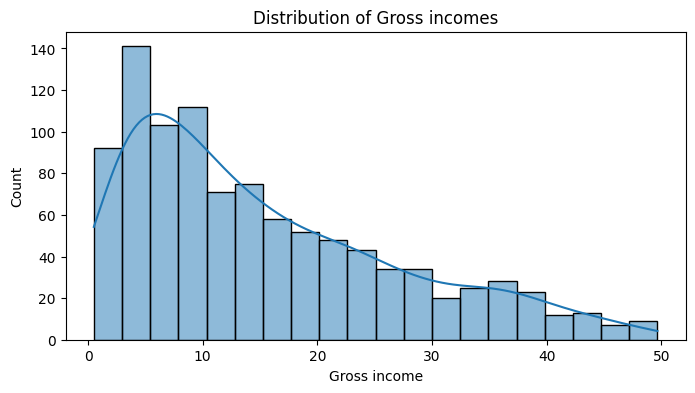

In [876]:
plt.figure(figsize=(8, 4))
sns.histplot(data['gross income'], bins=20, kde=True)
plt.title('Distribution of Gross incomes')
plt.xlabel('Gross income')
plt.show()

# a business should always look for their income, so let s see how it looks..


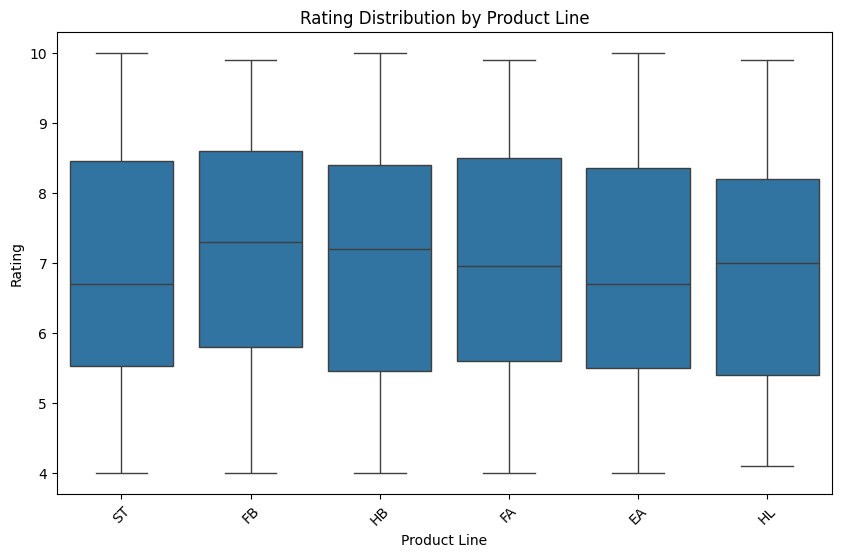

In [877]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Product line', y='Rating', data=new_data)
plt.title('Rating Distribution by Product Line')
plt.xticks(rotation=45)  # Rotating the x-axis labels for better readability
plt.xlabel('Product Line')
plt.ylabel('Rating')
plt.show()

# as we can see the rating is not correlated to product line

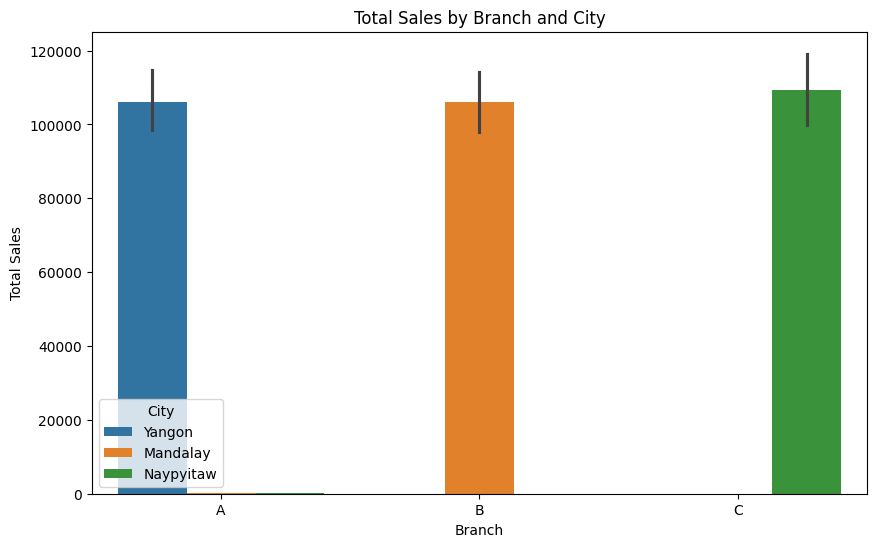

In [878]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', hue='City', data=data, estimator=sum)
plt.title('Total Sales by Branch and City')
plt.ylabel('Total Sales')
plt.show()

# we can see which branches and cities perform better in terms of sales

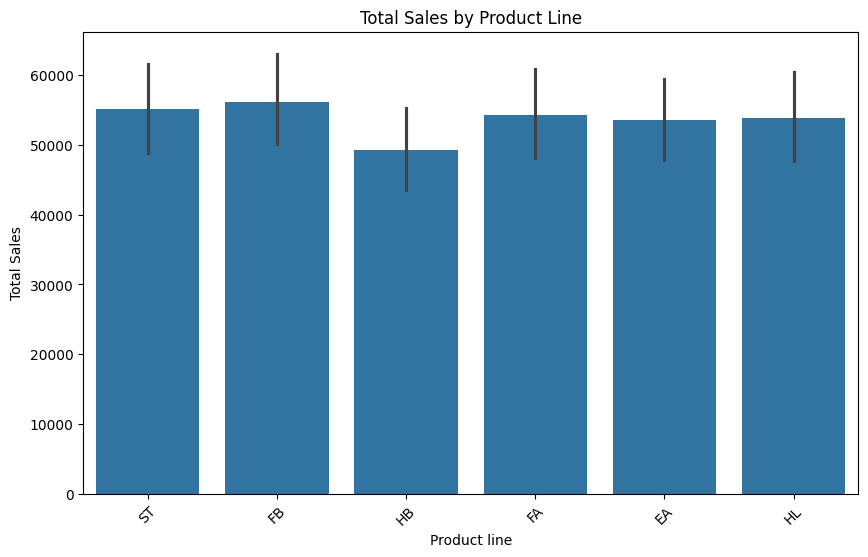

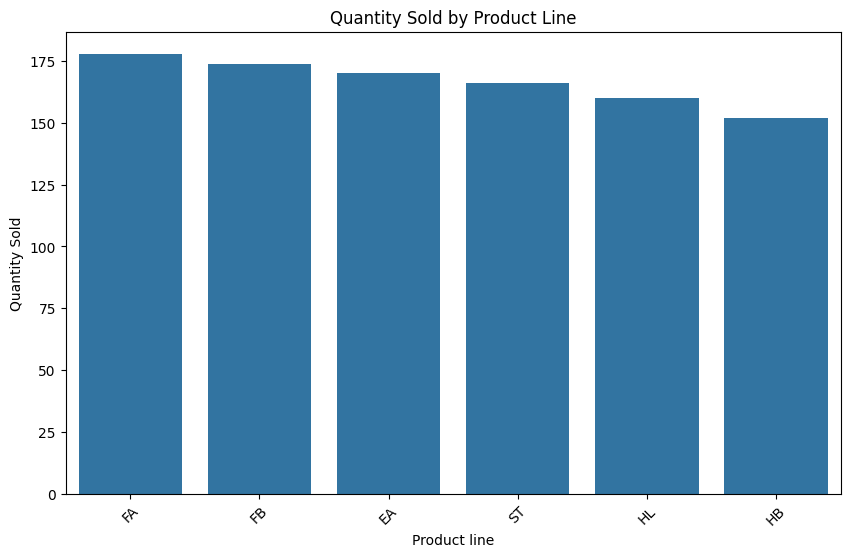

In [879]:
# Sales by Product Line
plt.figure(figsize=(10, 6))
sns.barplot(x='Product line', y='Total', data=data, estimator=sum)
plt.title('Total Sales by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Total Sales')
plt.show()

# Quantity Sold by Product Line
plt.figure(figsize=(10, 6))
sns.countplot(x='Product line', data=data, order = data['Product line'].value_counts().index)
plt.title('Quantity Sold by Product Line')
plt.xticks(rotation=45)
plt.ylabel('Quantity Sold')
plt.show()

# we can also see the performance of different product lines in terms of sales and quantity sold

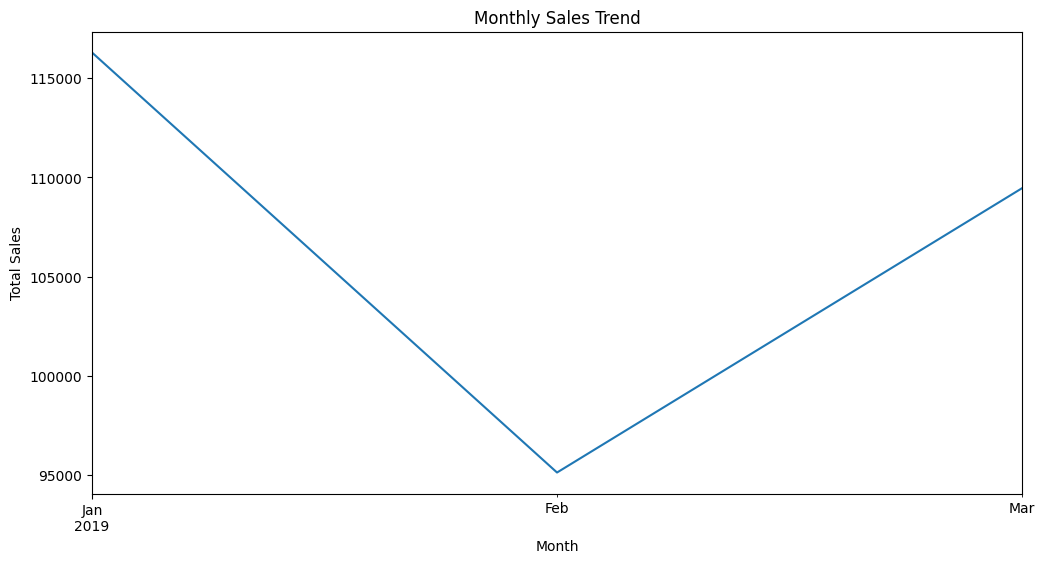

In [880]:
# Convert Date to DateTime object for easy handling
data['Date'] = pd.to_datetime(data['Date'])

# monthly sales
monthly_sales = data.resample('M', on='Date')['Total'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot()
plt.title('Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.show()

# checking sales over time to search for trends or seasonality


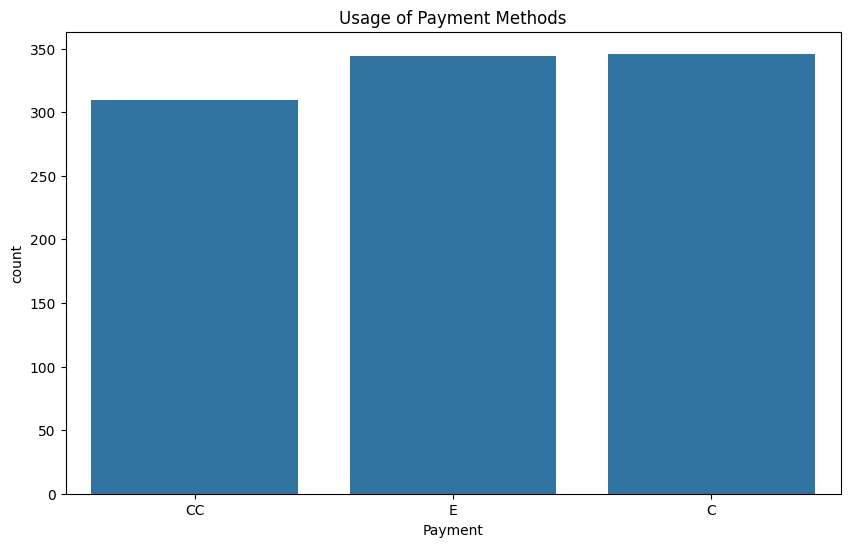

In [881]:
plt.figure(figsize=(10, 6))
sns.countplot(x='Payment', data=data)
plt.title('Usage of Payment Methods')
plt.show()

# checking payment methods CC = credit card, C = cash, E = Ewallet and their popularity


## Perform the analysis

*Use Pandas functions to perform the desired analysis. For example, you can use groupby(), pivot_table(), value_counts(), etc. to get information about the data.*

In [882]:
product_line_sales = data.groupby(['Branch', 'Product line'])['Total'].sum().reset_index()
print(product_line_sales)

# understanding the performance of each product in terms of total sales and average rating

   Branch Product line       Total
0       A           EA  18317.1135
1       A           FA  16332.5085
2       A           FB  17708.4915
3       A           HB  12597.7530
4       A           HL  22417.1955
5       A           ST  19372.6995
6       B           EA  17051.4435
7       B           FA  16413.3165
8       B           FB  14967.2985
9       B           HB  19980.6600
10      B           HL  17549.1645
11      B           ST  19988.1990
12      C           EA  18148.6095
13      C           FA  21560.0700
14      C           FB  23469.0540
15      C           HB  16615.3260
16      C           HL  13895.5530
17      C           ST  15761.9280


In [883]:
# Total Sales by Branch and City
sales_by_branch_city = data.groupby(['Branch', 'City'])['Total'].sum().reset_index()
print(sales_by_branch_city)

# understanding total sales based on branch and city

  Branch       City        Total
0      A   Mandalay     247.5900
1      A  Naypyitaw     297.8010
2      A     Yangon  106200.3705
3      B   Mandalay  105950.0820
4      C  Naypyitaw  109450.5405


In [884]:
data['Date'] = pd.to_datetime(data['Date'])
monthly_sales = data.resample('M', on='Date')['Total'].sum()
print(monthly_sales)

# understanding how sales have varied month over month

Date
2019-01-31    116291.868
2019-02-28     95130.777
2019-03-31    109455.507
Name: Total, dtype: float64


In [885]:
payment_method_usage = data['Payment'].value_counts()
print(payment_method_usage)

# see the frquency of different payment methods

Payment
C     346
E     344
CC    310
Name: count, dtype: int64


In [886]:
# by customer types
customer_type_count = data['Customer type'].value_counts()
print(customer_type_count)
# 0 = normal, 1 = member

# by gender
gender_count = data['Gender'].value_counts()
print(gender_count)
# 0 = male, 1 = female

# understanding the distribution based on customer types and gender


Customer type
1    503
0    497
Name: count, dtype: int64
Gender
0    500
1    500
Name: count, dtype: int64


## Communicate your findings

It's important to communicate your findings clearly and effectively. Use visualization libraries to create charts and graphs that are easy to understand. You can also use natural language to explain your findings.

Utilizing Python and its powerful data manipulation library, Pandas, we conducted an in-depth exploration of the dataset to uncover insights into sales performance, customer behavior, and product popularity.

The dataset was first subjected to a thorough cleaning and preprocessing phase, where the following tasks were performed:

 - Handling missing values in columns such as 'Branch', 'Customer Type', and 'Unit Price'.
 - Converting 'Date' and 'Time' columns to appropriate datetime formats for better analysis.
 - Ensuring consistency in categorical data and handling potential outliers in numerical columns.

Key Analyses Performed:
    - Sales Distribution by Branch and City
We analyzed the total sales per branch and city to understand the geographical distribution of sales and identify high-performing regions.

    - Product Line Performance
The dataset was explored to assess the performance of different product lines in terms of sales volume and average customer ratings.

    - Customer Demographics
We delved into the customer demographics, examining the distribution of customer types and genders to understand the customer base better.

    - Monthly Sales Trend
An analysis of how sales have varied month over month was conducted to identify any trends or seasonal patterns.

    - Quantity vs. Unit Price Relationship
We investigated the relationship between the quantity sold and the unit price of products to understand pricing strategy implications.

    - Payment Method Preferences
The frequency of different payment methods used by customers was analyzed to gain insights into customer payment preferences.

Key findings:
As we can see, most of the data is pretty well spread, so it means that the supermarket business trend is looking pretty good. Although, we can observe several ideas:
- most sales come from Naypyitaw
- most sales are in first month of the year (January), then it drastically falls, and then the sales increase again
- most sales by product line come from Food and beverages and least sales from Health and beauty
- most used payment method is Cash (is this relevant?)

This analysis provides valuable insights that can aid in strategic decision-making for the supermarket. The findings highlight key areas of strength and opportunities for improvement in various aspects of the business.


